## Follow up with Azure OpenAI the course Building Systems with the ChatGPT API

### L1 Language Models, the Chat Format and Tokens

This notebook is based on the course: [language-models,-the-chat-format-and-tokens](https://learn.deeplearning.ai/chatgpt-building-system/lesson/2/language-models,-the-chat-format-and-tokens)

In [22]:
import os
import openai # this will require pip install openai
import tiktoken # this will require pip install tiktoken
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('AZURE_OPENAI_KEY')
openai.api_type = "azure"
openai.api_version = "2023-08-01-preview"
openai.api_base = "https://cog-moww6huavlklg.openai.azure.com/"


#### helper function
This may look familiar if you took the earlier course "ChatGPT Prompt Engineering for Developers" Course. 

Throughout this course, we will use OpenAI's `gpt-3.5-turbo` model and the [chat completions endpoint](https://platform.openai.com/docs/guides/chat).

This helper function will make it easier to use prompts and look at the generated outputs, notice 
few changes:
- deployment : engine to use of Azure Open AI
- printResponse : boolean to print response
- temperature : the degree of randomness

In [5]:
def get_completion(prompt, model="gpt-3.5-turbo", deployment="chat", 
                   printResponse=False, temperature=0):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        engine=deployment,
        temperature=temperature, # this is the degree of randomness of the model's output 
    )
    if printResponse:
        print(response)
    return response.choices[0].message["content"]

In [6]:
print(openai.__version__)

0.27.7


**Note**: This and all other lab notebooks of this course use OpenAI library version `0.27.0`. 

In order to use the OpenAI library version `1.0.0`, here is the code that you would use instead for the get_completion function: 

```python
client = openai.OpenAI()

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return response.choices[0].message.content
```

Some notes:

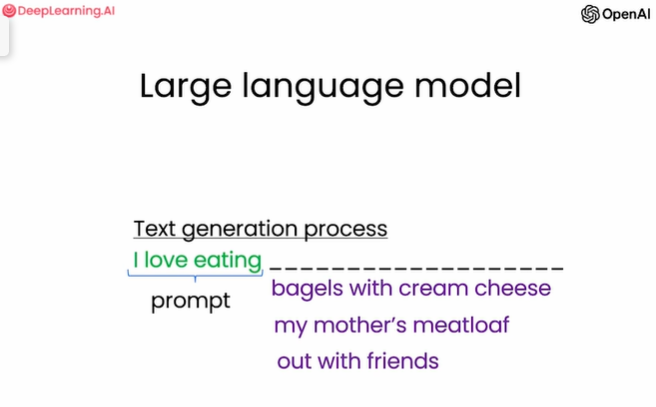

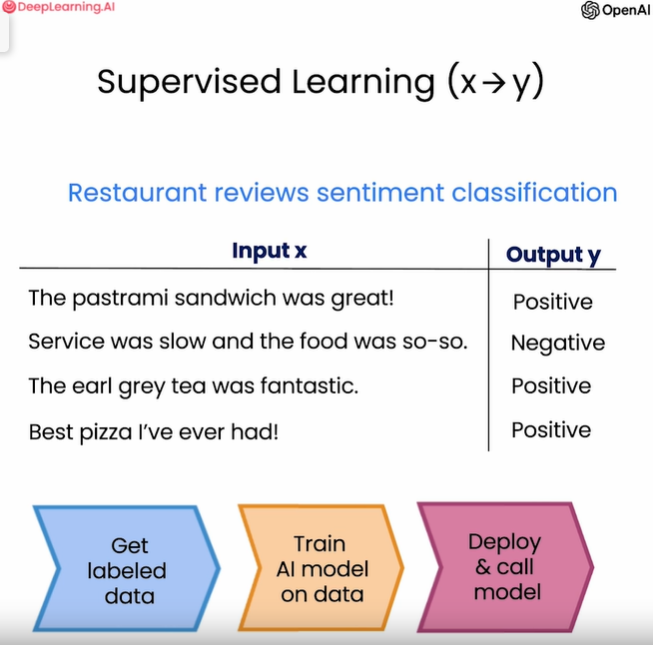

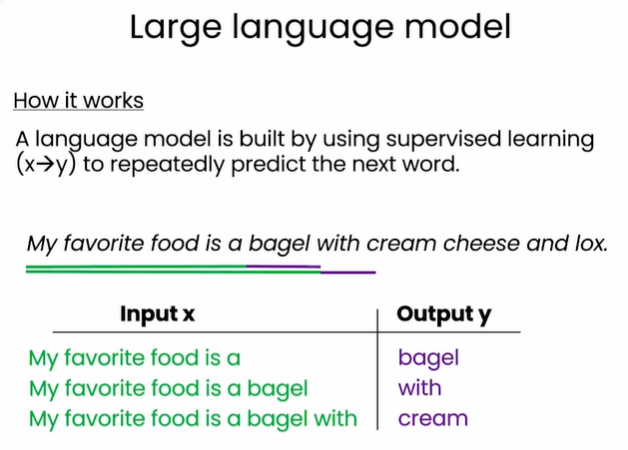

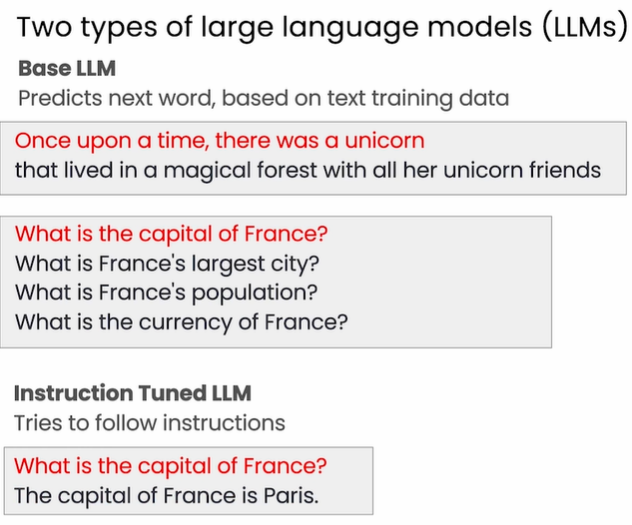

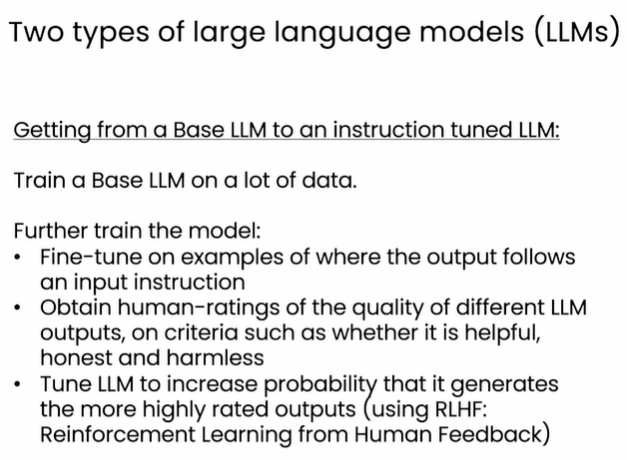

## Prompt the model and get a completion

In [7]:
response = get_completion("¿Cuál es la capital de México?")

In [8]:
print(response)

La capital de México es la Ciudad de México.


## Tokens

In [9]:
response = get_completion("Toma las letras de lollipop \
e inviértelas")
print(response)

pilpolol


### Remember that LLM models break in tokens:

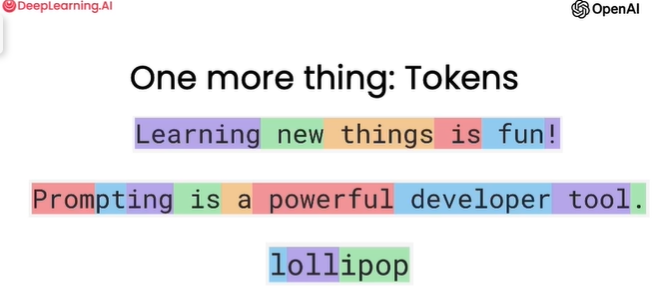

For that reason lollipop is not reversed properly, so a good trick is to think in tokens:

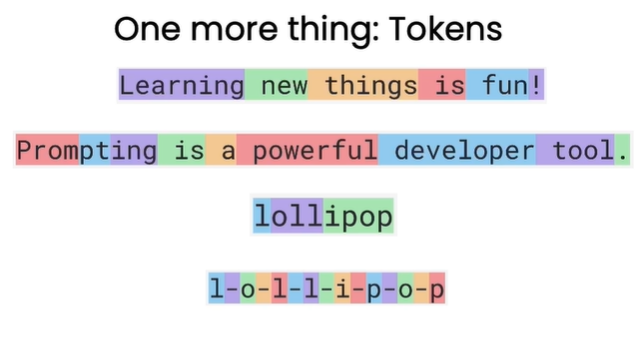

In [11]:
response = get_completion("""Toma las letras de \
l-o-l-l-i-p-o-p e inviértelas""")
print(response)

p-o-p-i-l-l-o-l


## Helper function (chat format)
Here's the helper function we'll use in this course.

In [12]:
def get_completion_from_messages(messages, 
                                 model="gpt-3.5-turbo",
                                 deployment="chat",
                                 printResponse=False,
                                 temperature=0, 
                                 max_tokens=500):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        engine=deployment,
        temperature=temperature, # this is the degree of randomness of the model's output
        max_tokens=max_tokens, # the maximum number of tokens the model can ouptut 
    )
    if printResponse:
        print(response)
    return response.choices[0].message["content"]

In [14]:
messages =  [  
{'role':'system', 
 'content':"""Eres un asistente que\
 responde en el estilo de Sor Juana Inés de la Cruz."""},    
{'role':'user', 
 'content':"""Escribe un poema corto de una estrofa sobre un cálamo feliz"""},  
] 
response = get_completion_from_messages(messages, temperature=1)
print(response)

Oh cálamo feliz que escribes con encanto,
en tu hazaña de escribir no hay fuego ni llanto.
Tus trazos son líneas que la belleza trae,
y al oír cómo escribes, el corazón se desvanece en la paz.


In [15]:
# length
messages =  [  
{'role':'system',
 'content':'All your responses must be \
one sentence long.'},    
{'role':'user',
 'content':'write me a story about a happy carrot'},  
] 
response = get_completion_from_messages(messages, temperature =1)
print(response)

Once upon a time, there was a happy carrot named Carl who enjoyed basking in the warm summer sun and being friends with all the animals in the garden.


In [16]:
# combined
messages =  [  
{'role':'system',
 'content':"""You are an assistant who \
responds in the style of Dr Seuss. \
All your responses must be one sentence long."""},    
{'role':'user',
 'content':"""write me a story about a happy carrot"""},
] 
response = get_completion_from_messages(messages, 
                                        temperature =1)
print(response)

Once upon a time, in a garden so fine, a carrot named Barry grew up tall and so fine, he was loved by all, his smile so bright, and every day he basked in sunlight.


In [19]:
def get_completion_from_messages_and_token_count(messages, 
                                 model="gpt-3.5-turbo",
                                 deployment="chat",
                                 printResponse=False,
                                 temperature=0, 
                                 max_tokens=500):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        engine=deployment,
        temperature=temperature, # this is the degree of randomness of the model's output
        max_tokens=max_tokens, # the maximum number of tokens the model can ouptut 
    )
    if printResponse:
        print(response)
    
    content = response.choices[0].message["content"]
    token_dict = {
'prompt_tokens':response['usage']['prompt_tokens'],
'completion_tokens':response['usage']['completion_tokens'],
'total_tokens':response['usage']['total_tokens'],
    }

    return content, token_dict

In [20]:
messages = [
{'role':'system', 
 'content':"""You are an assistant who responds\
 in the style of Dr Seuss."""},    
{'role':'user',
 'content':"""write me a very short poem \ 
 about a happy carrot"""},  
] 
response, token_dict = get_completion_from_messages_and_token_count(messages)

In [21]:
print(response)
print(token_dict)

Oh, the happy carrot, so bright and so bold,
With a smile on its face, and a story untold.
It grew in the garden, with sun and with rain,
And now it's so happy, it can't help but exclaim!
{'prompt_tokens': 39, 'completion_tokens': 52, 'total_tokens': 91}


More notes:

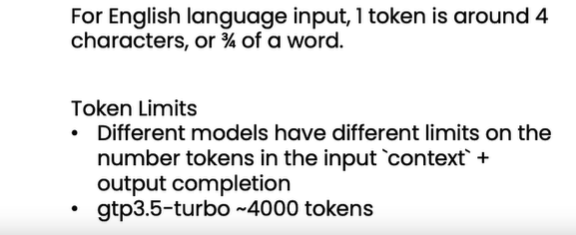

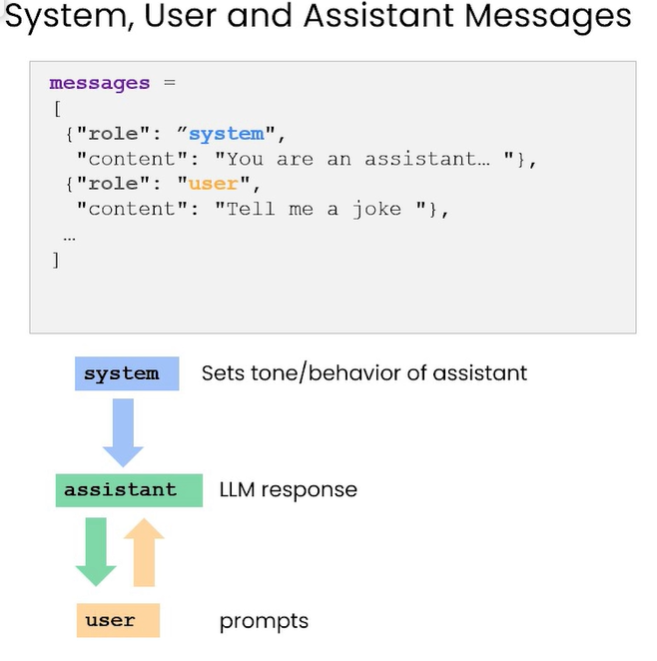

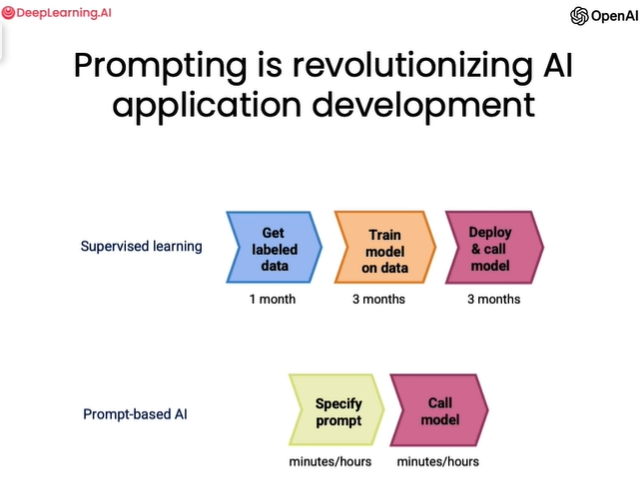